In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [28]:
import locale
import calendar
import pandas as pd
import numpy as np

In [3]:
# index
df_tranfer = pd.read_csv("record_transfers.csv")
locale.setlocale(locale.LC_NUMERIC, '')
df_tranfer['fee_pounds'] = df_tranfer.fee_pounds.apply(locale.atof)
#df_tranfer['yr'] vs df_tranfer['fee_pounds']

In [4]:
# league data
df_rank = pd.read_csv('wc_rankings.csv')
# Germany includes West (not East) Germany in their footballing history
df_rank = df_rank.replace(to_replace="West Germany", value="Germany")

team_avg_ranking = df_rank.groupby('team').ranking.mean().to_frame()
team_num_wc = df_rank.team.value_counts().head(50).to_frame()
        
df_team_rank = team_avg_ranking.join(team_num_wc)
df_team_rank = df_team_rank.dropna()
# df_team_rank.team, df_team_rank.ranking

In [7]:
df_squads = pd.read_csv('wc_squads.csv')
grouped = df_squads.groupby('WC_Year') # Why groupby?
club_country = df_squads.Club_Country.unique()
club_country.sort()
df_clb_ctry = pd.DataFrame({"club_country":club_country})
df_clb_ctry = df_clb_ctry.set_index("club_country")

In [8]:
# for year in df.WC_Year.unique():
#     country_to_club = grouped.Club_Country.value_counts()[year] / grouped.Country.value_counts()[year]
#     df_clb_ctry = df_clb_ctry.join(country_to_club.to_frame(year))

In [9]:
df_clb_ctry = df_clb_ctry.fillna(0) # If NaN, country league not represented at the world cup
df_clb_ctry = df_clb_ctry.T

In [10]:
# take the top 11 countries and plot
# for num, country in enumerate(df_clb_ctry.sum().sort_values(ascending=False).head(11).index):
    # plot df_clb_ctry.index vs df_clb_ctry[country]

In [14]:
df_league_data = pd.read_csv("top_five_leagues.csv")
df_expats = df_league_data[df_league_data.nation!=df_league_data.nationality]

In [15]:
for season in df_expats.season.unique():
    nationality_expats = df_expats.groupby('season').nationality.value_counts()[season].head(10)
    nation_expats = df_expats.groupby('season').nation.value_counts()[season]

([<matplotlib.axis.XTick at 0x114bf0990>,
 <a list of 5 Text xticklabel objects>)

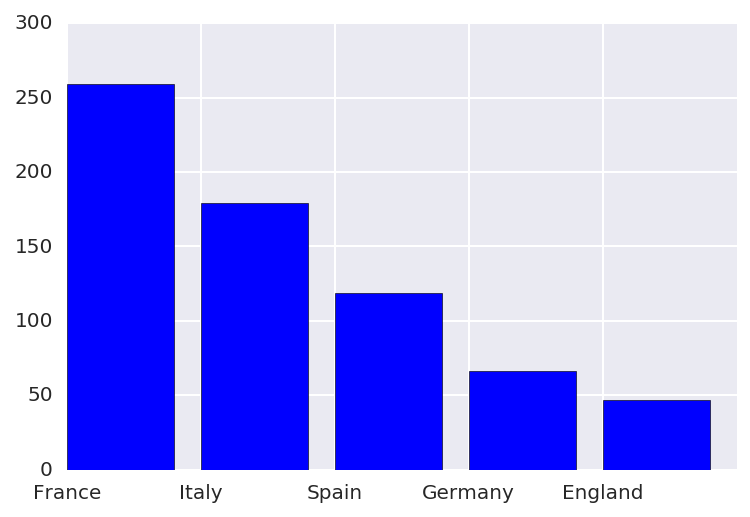

In [35]:
# bar plot nationality_expats
bar_plt = plt.bar(np.arange(5), nation_expats.values, color="blue")
plt.xticks(np.arange(5), tuple(nation_expats.index))

In [ ]:
# player data

In [ ]:
# Create a mapping of month number to string abbreviation
month_map = {k: v for k,v in enumerate(calendar.month_abbr)}

# convert date of birth column to datetime
df_squads.DoB = pd.to_datetime(df_squads.DoB) 
# extract player birth month number
df_squads['birth_month'] = df_squads.DoB.map(lambda x: x.month) 
# create data from of birth month data
df_mth = df_squads.birth_month.value_counts().sort_index() 
# convert birth month number to month ("01" to "Jan"'")
df_mth.index = df_mth.index.map(lambda x: month_map[x]) 

In [12]:
# Investigate team average age
grouped = df_squads.groupby('WC_Year')
avg_age = df_squads.groupby('WC_Year').Age.mean().to_frame()
# line plot avg_age.index vs avg_age.Age.values
# Possibly look at age and age variance by team, against team performance